In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/Paddy diseases/Rice_Leaf_Diease/Rice_Leaf_Diease/train',
                                               target_size=(224, 224), batch_size=32, class_mode='categorical')
val_data = val_datagen.flow_from_directory('/content/drive/MyDrive/Paddy diseases/Rice_Leaf_Diease/Rice_Leaf_Diease/test',
                                           target_size=(224, 224), batch_size=32, class_mode='categorical')


Found 7736 images belonging to 5 classes.
Found 1797 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fine-tuning
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # 5 categories for your paddy diseases
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # You can increase the number of epochs for better performance
    steps_per_epoch=train_data.samples // 32,
    validation_steps=val_data.samples // 32
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


241/241 ━━━━━━━━━━━━━━━━━━━━ 3957s 16s/step - accuracy: 0.3097 - loss: 1.5329 - val_accuracy: 0.4554 - val_loss: 1.2861
Epoch 2/10
  1/241 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.3750 - loss: 1.2538

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3750 - loss: 1.2538 - val_accuracy: 0.6000 - val_loss: 1.2548
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 261s 937ms/step - accuracy: 0.4555 - loss: 1.3028 - val_accuracy: 0.5017 - val_loss: 1.2549
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - accuracy: 0.4688 - loss: 1.1610 - val_accuracy: 0.4000 - val_loss: 1.4166
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 269s 970ms/step - accuracy: 0.4786 - loss: 1.2522 - val_accuracy: 0.4699 - val_loss: 1.2188
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.5625 - loss: 1.0403 - val_accuracy: 0.2000 - val_loss: 1.4601
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 225s 913ms/step - accuracy: 0.4907 - loss: 1.2197 - val_accuracy: 0.4760 - val_loss: 1.1916
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.5000 - loss: 1.2721 - val_accuracy: 0.6000 - val_loss: 1.0392
Epoch 9/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 230s 936ms/step - accuracy: 0.4863 - loss: 1.2112 - val_a

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 631ms/step - accuracy: 0.5087 - loss: 1.2014
Validation Accuracy: 50.58%


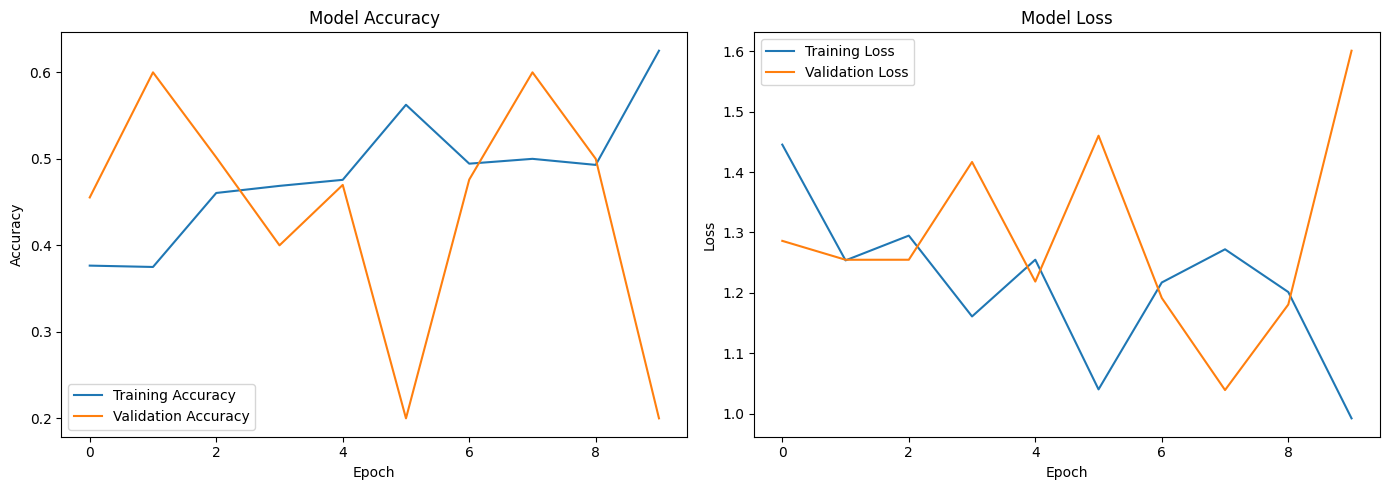

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
val_preds = model.predict(val_data)
val_preds_classes = np.argmax(val_preds, axis=1)

# Print Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(val_data.classes, val_preds_classes))

# Print Classification Report
print('Classification Report')
print(classification_report(val_data.classes, val_preds_classes, target_names=list(train_data.class_indices.keys())))


57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 565ms/step
Confusion Matrix
[[ 56  97   0  60  75]
 [ 87 121   0  90  78]
 [ 73 156   0  81  70]
 [101 162   0  67  61]
 [ 95 117   0  81  69]]
Classification Report
                       precision    recall  f1-score   support

        Sheath Blight       0.14      0.19      0.16       288
bacterial_leaf_blight       0.19      0.32      0.24       376
           brown_spot       0.00      0.00      0.00       380
              healthy       0.18      0.17      0.17       391
           leaf_blast       0.20      0.19      0.19       362

             accuracy                           0.17      1797
            macro avg       0.14      0.18      0.15      1797
         weighted avg       0.14      0.17      0.15      1797



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Dictionary of treatment suggestions
treatment_suggestions = {
    'bacterial_leaf_blight': {
        'Symptoms': "Water-soaked lesions on leaves, often leading to yellowing.",
        'Treatment': ["Copper Oxychloride", "Bactericide"],
        'How_to_Use': "Spray on affected leaves every 10-14 days.",
        'Recommendations': "Monitor moisture levels and avoid overhead irrigation."
    },
    'brown_spot': {
        'Symptoms': "Dark brown spots on leaves, often with a yellow halo.",
        'Treatment': ["Carbendazim", "Bavistin"],
        'How_to_Use': "Apply fungicide at the first sign of symptoms.",
        'Recommendations': "Use resistant varieties and practice crop rotation."
    },
    'healthy': {
        'Symptoms': "No visible symptoms; leaves are green and healthy.",
        'Treatment': [],
        'How_to_Use': "No treatment needed; maintain good farming practices.",
        'Recommendations': "Continue regular monitoring."
    },
    'leaf_blast': {
        'Symptoms': "Elongated, grayish lesions on leaves; leaves may die.",
        'Treatment': ["Tricyclazole", "Fungicide"],
        'How_to_Use': "Apply as soon as symptoms are observed.",
        'Recommendations': "Ensure proper spacing between plants for air circulation."
    },
    'Sheath Blight': {
        'Symptoms': "Lesions on the sheath of leaves, leading to premature drying.",
        'Treatment': ["Pyricularia", "Fungicide"],
        'How_to_Use': "Apply fungicide as per label instructions.",
        'Recommendations': "Avoid high-density planting and maintain good drainage."
    }
}

# Function to get treatment based on prediction
def get_treatment_suggestion(disease_class):
    return treatment_suggestions[disease_class]

# Example usage:
disease_classes = {v: k for k, v in train_data.class_indices.items()}  # Mapping class indices to disease names
predicted_class = val_preds_classes[0]  # For demonstration, using the first prediction
disease_name = disease_classes[predicted_class]

treatment = get_treatment_suggestion(disease_name)
print(f"Disease: {disease_name}")
print(f"Treatment Suggestion: {treatment}")


Disease: Sheath Blight
Treatment Suggestion: {'Symptoms': 'Lesions on the sheath of leaves, leading to premature drying.', 'Treatment': ['Pyricularia', 'Fungicide'], 'How_to_Use': 'Apply fungicide as per label instructions.', 'Recommendations': 'Avoid high-density planting and maintain good drainage.'}


In [ ]:
# Resave the model in case of any serialization issue
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50

# Define and configure the model structure
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # Adjust output classes
])

# Save the model properly
model.save('paddy_disease_model_fixed.h5')


57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 660ms/step


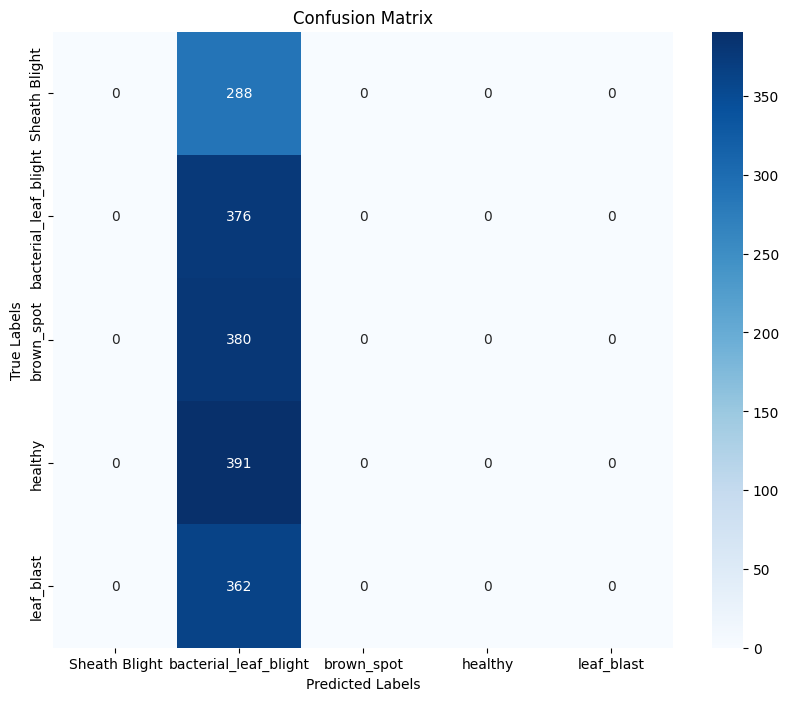

Classification Report:
                       precision    recall  f1-score   support

        Sheath Blight       0.00      0.00      0.00       288
bacterial_leaf_blight       0.21      1.00      0.35       376
           brown_spot       0.00      0.00      0.00       380
              healthy       0.00      0.00      0.00       391
           leaf_blast       0.00      0.00      0.00       362

             accuracy                           0.21      1797
            macro avg       0.04      0.20      0.07      1797
         weighted avg       0.04      0.21      0.07      1797



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `val_data` is your validation data generator
# Get ground truth labels
true_labels = val_data.classes

# Predict on validation data
val_preds = model.predict(val_data)
predicted_labels = np.argmax(val_preds, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=list(val_data.class_indices.keys())))


In [ ]:
model = load_model('paddy_disease_model_fixed.h5', compile=False)


In [ ]:
from tensorflow.keras import Input, Model

# Define a custom input layer
input_layer = Input(shape=(224, 224, 3))
# Load the model with the specified input shape
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_layer)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# Save this corrected model
model.save('paddy_disease_model_fixed2.h5')


In [ ]:
# Dictionary of treatment suggestions
treatment_suggestions = {
    'bacterial_leaf_blight': {
        'Symptoms': "Water-soaked lesions on leaves, often leading to yellowing.",
        'Treatment': ["Copper Oxychloride", "Bactericide"],
        'How_to_Use': "Spray on affected leaves every 10-14 days.",
        'Recommendations': "Monitor moisture levels and avoid overhead irrigation."
    },
    'brown_spot': {
        'Symptoms': "Dark brown spots on leaves, often with a yellow halo.",
        'Treatment': ["Carbendazim", "Bavistin"],
        'How_to_Use': "Apply fungicide at the first sign of symptoms.",
        'Recommendations': "Use resistant varieties and practice crop rotation."
    },
    'healthy': {
        'Symptoms': "No visible symptoms; leaves are green and healthy.",
        'Treatment': [],
        'How_to_Use': "No treatment needed; maintain good farming practices.",
        'Recommendations': "Continue regular monitoring."
    },
    'leaf_blast': {
        'Symptoms': "Elongated, grayish lesions on leaves; leaves may die.",
        'Treatment': ["Tricyclazole", "Fungicide"],
        'How_to_Use': "Apply as soon as symptoms are observed.",
        'Recommendations': "Ensure proper spacing between plants for air circulation."
    },
    'Sheath Blight': {
        'Symptoms': "Lesions on the sheath of leaves, leading to premature drying.",
        'Treatment': ["Pyricularia", "Fungicide"],
        'How_to_Use': "Apply fungicide as per label instructions.",
        'Recommendations': "Avoid high-density planting and maintain good drainage."
    }
}

# Function to get treatment based on prediction
def get_treatment_suggestion(disease_class):
    return treatment_suggestions[disease_class]




In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



# Load an image for prediction
img_path = '/content/drive/MyDrive/myTest/healthy_paddy leaves.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the disease
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
disease_name = disease_classes[predicted_class]

# Get the treatment suggestion
treatment = get_treatment_suggestion(disease_name)
print(f"Disease: {disease_name}")
print(f"Treatment Suggestion: {treatment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Disease: bacterial_leaf_blight
Treatment Suggestion: {'Symptoms': 'Water-soaked lesions on leaves, often leading to yellowing.', 'Treatment': ['Copper Oxychloride', 'Bactericide'], 'How_to_Use': 'Spray on affected leaves every 10-14 days.', 'Recommendations': 'Monitor moisture levels and avoid overhead irrigation.'}
